# Compare with OpenFOAM

1. Load the PKL file containing the pressure signal from LES simulation
2. Load the head values printed by OpenFOAM
2. Plot both signals (P v. time)
3. Plot their DFT (Mag v. freq)

**Note:** Converting the postProcessing folder from OpenFOAM is done with `pointFiles.sh`

OpenFoam was run at a deltaTime 10 times longer than the original time step - which is good enough to conserve the low frequencies while keeping the temporal resolution of the signal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random
from os import system

In [2]:
# Load original data (from LES surface simulation)
RAWFILE = "pickledData_constg/PTX(3).pkl"
with open(RAWFILE,'rb') as f: P_LES = pickle.load(f)

In [3]:
!pwd

/home/edsaa/nuModel/bioclogging/notebooks/LEStaskstream


In [4]:
# Load head probed (from filtrationFix model)
# File paths
FOLDER = r"./postProcessing_constg"
PFILE = f"{FOLDER}/h.txt"
TFILE = f"{FOLDER}/time.txt"
XFILE = f"{FOLDER}/xyz.txt"

# Load files
X = pd.read_csv(XFILE,sep=" ",names=['X','Y','Z'])
T = pd.read_csv(TFILE,delimiter=" ",header=None)
P_CFT = pd.read_csv(PFILE,delimiter=" ",header=None)

In [5]:
P_CFT *= 9.81
P_CFT['Time'] = T
P_CFT.set_index('Time',inplace=True)
P_CFT.rename(columns=X['X'],inplace=True)

In [32]:
# Which of the x-index to show in plot
whx = 32

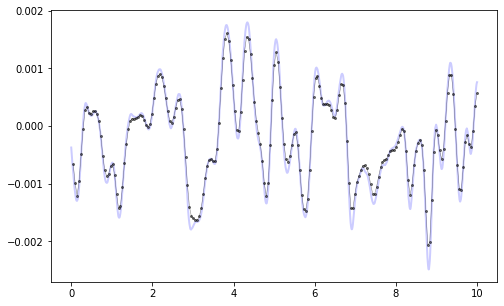

In [35]:
#line_dict = dict(lw=1,alpha=1)
fig,ax = plt.subplots(figsize=[8,5])
ax.plot(P_LES.iloc[:,whx][P_LES.index < 10],\
        lw=2,alpha=0.2,c='b')
ax.plot(P_CFT.iloc[:,whx+1][P_CFT.index < 10],\
        lw=0.5,alpha=0.5,marker='.',c='k',ms=4)
plt.show()

In [21]:
# Calculate DFT
def fourierAnalysis(P):
    dT, nP = P.index[1] - P.index[0], len(P)
    fourier = pd.DataFrame({'Freq':np.fft.rfftfreq(nP,d=dT)})
    fourier.set_index("Freq",inplace=True)
    for col in P: fourier[col] = np.fft.rfft(P[col])
    print(f"Timestep = {dT} \nLast time = {P.index[-1]}\n")
    return fourier

from scipy.signal import welch
def welchAnalysis(P):
    dT, nP = P.index[1] - P.index[0], len(P)
    welch_dict = dict(fs=1/dT,scaling='density')
    welchResult = pd.DataFrame()
    for col in P: f,welchResult[col] = welch(P[col],**welch_dict)
    welchResult["Freq"] = f
    welchResult.set_index("Freq",inplace=True)
    return welchResult

In [29]:
P_LES.shape

(32768, 51)

In [28]:
P_CFT.shape

(3277, 51)

In [22]:
f1 = fourierAnalysis(P_LES)
f2 = fourierAnalysis(P_CFT)

Timestep = 0.004854248259107408 
Last time = 159.05915270459468

Timestep = 0.0485425 
Last time = 159.0737725



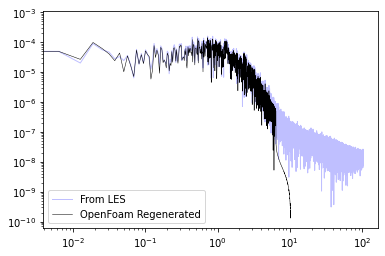

In [30]:
fig,ax = plt.subplots()
ax.plot(f1.index,np.absolute(f1.iloc[:,whx])/len(P_LES),\
        lw=1,alpha=0.25,c='b',zorder=1,label='From LES')
ax.plot(f2.index,np.absolute(f2.iloc[:,whx])/len(P_CFT),\
        lw=0.5,c='k',zorder=2,label='OpenFoam Regenerated')
ax.set(yscale='log',xscale='log')
ax.legend()
plt.show()

In [24]:
w1 = welchAnalysis(P_LES)
w2 = welchAnalysis(P_CFT)

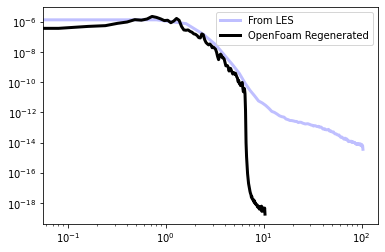

In [31]:
fig,ax = plt.subplots()
ax.plot(w1.index,w1.iloc[:,whx],\
        lw=3,alpha=0.25,c='b',zorder=1,label='From LES')
ax.plot(w2.index,w2.iloc[:,whx],\
        lw=3,c='k',zorder=2,label='OpenFoam Regenerated')
ax.set(yscale='log',xscale='log')
ax.legend()
plt.show()

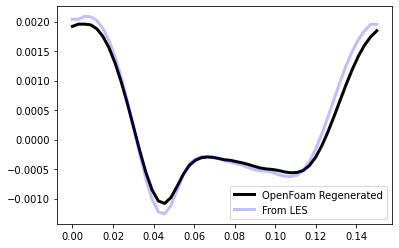

In [12]:
fig,ax = plt.subplots()
P_CFT.mean().plot(lw=3,c='k',ax=ax,label='OpenFoam Regenerated')
P_LES.mean().plot(lw=3,alpha=0.25,c='b',ax=ax,label='From LES')
ax.legend()
plt.show()

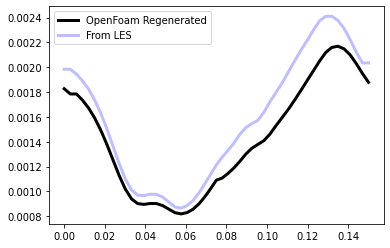

In [13]:
fig,ax = plt.subplots()
P_CFT.std().plot(lw=3,c='k',ax=ax,label='OpenFoam Regenerated')
P_LES.std().plot(lw=3,alpha=0.25,c='b',ax=ax,label='From LES')
ax.legend()
plt.show()

In [14]:
for i,j in zip(list(P_CFT.columns),list(P_LES.columns)): 
    print("{:.6f},{:.6f}".format(i,j))

0.000000,0.000000
0.003037,0.003037
0.006063,0.006063
0.009080,0.009079
0.012089,0.012088
0.015093,0.015093
0.018095,0.018095
0.021099,0.021100
0.024108,0.024109
0.027124,0.027125
0.030149,0.030150
0.033186,0.033187
0.036235,0.036236
0.039296,0.039297
0.042366,0.042367
0.045443,0.045443
0.048519,0.048518
0.051586,0.051583
0.054628,0.054623
0.057633,0.057628
0.060599,0.060595
0.063529,0.063525
0.066426,0.066423
0.069298,0.069296
0.072154,0.072152
0.075000,0.075000
0.077846,0.077848
0.080702,0.080704
0.083574,0.083577
0.086471,0.086475
0.089401,0.089405
0.092367,0.092372
0.095372,0.095377
0.098414,0.098417
0.101481,0.101482
0.104557,0.104557
0.107634,0.107633
0.110704,0.110703
0.113765,0.113764
0.116814,0.116813
0.119851,0.119850
0.122876,0.122875
0.125892,0.125892
0.128901,0.128901
0.131905,0.131905
0.134907,0.134907
0.137911,0.137911
0.140920,0.140920
0.143937,0.143937
0.146963,0.146963
0.150000,0.150000


In [15]:
len(P_LES.columns)

51